In [1]:
from common import *
from utils import *
from models import *
from data_loader import *
from train import *
%matplotlib inline

In [2]:
def generate_random_versions_of_image(image, transformer, n_versions=10):
    output = []
    for i in range(n_versions):
        output.append(transformer(image))

    return torch.stack(output)

In [3]:
def get_reconstruction_loss_with_all_ae(image, autoencoder_mixture, loss_fn):
    recon_loss_mix = []
    recon_loss_mix_normalized = []
    
    for aspect, aspect_param in autoencoder_mixture.items():
        image = to_var(image)
        recon_image = aspect_param['autoencoder'](image)
        recon_loss  = loss_fn(recon_image, image).data.sum()
        recon_loss_mix.append(recon_loss)
        recon_loss_mix_normalized.append(abs(recon_loss - aspect_param['recon_error']))
    return np.array(recon_loss_mix), np.array(recon_loss_mix_normalized)

In [4]:
def belief_for_observation(image, autoencoder_mixture, loss_fn):
    belief = 1./get_reconstruction_loss_with_all_ae(image, autoencoder_mixture, loss_fn)[0]
    belief /= belief.sum()
    return belief


[0.12331768] [0.12331768] 0.12331768
[Observation: 0 Num Aspects: 1 min recon loss: 0.1233]

Training aspect_autoencoder_0 ...


/home/daniel/miniconda3/envs/atg/lib/python3.6/site-packages/torch/nn/modules/loss.py:498: UserWarning: Using a target size (torch.Size([4, 1, 3, 128, 128])) that is different to the input size (torch.Size([4, 3, 128, 128])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


epoch 0 loss: 0.68625
epoch 1 loss: 0.44706
epoch 2 loss: 0.41318
epoch 3 loss: 0.40792
epoch 4 loss: 0.40633
Done training aspect_autoencoder_0


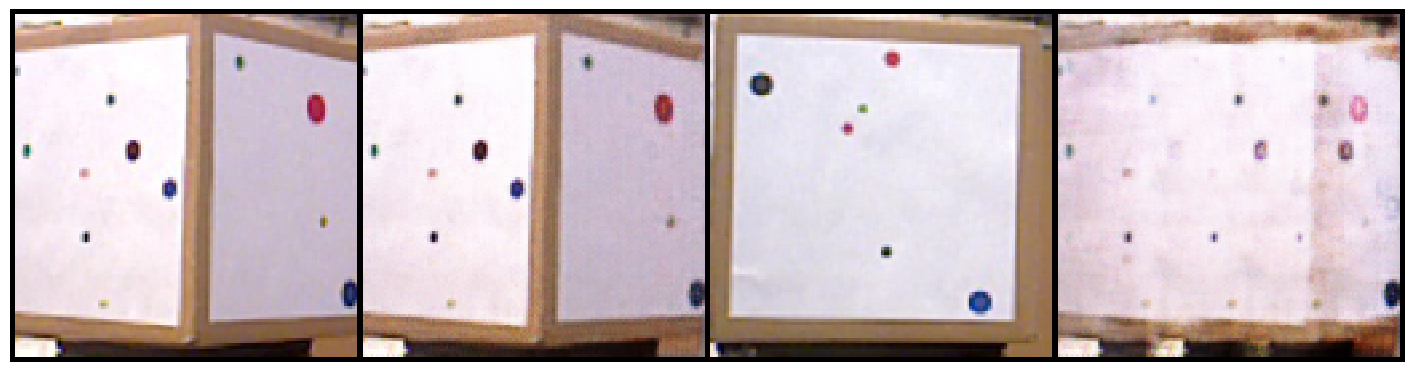

[0.02784369] [0.02736255] 0.027362552
[Observation: 1 Num Aspects: 1 min recon loss: 0.0274]
Creating aspect_1

Training aspect_autoencoder_1 ...
epoch 0 loss: 0.67832
epoch 1 loss: 0.50961
epoch 2 loss: 0.48296
epoch 3 loss: 0.47876
epoch 4 loss: 0.47782
Done training aspect_autoencoder_1


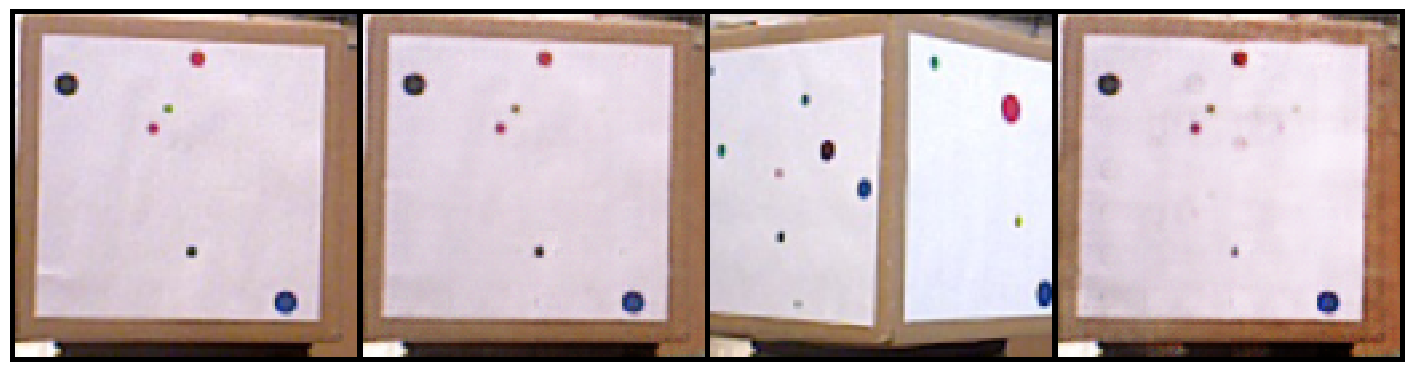

[0.02795457 0.00049163] [0.02747343 0.00010224] 0.00010223806
[Observation: 2 Num Aspects: 2 min recon loss: 0.0001]
[0.0257048  0.06260422] [0.02522366 0.06221483] 0.025223656
[Observation: 3 Num Aspects: 2 min recon loss: 0.0252]
Creating aspect_2

Training aspect_autoencoder_2 ...
epoch 0 loss: 0.70349
epoch 1 loss: 0.31561
epoch 2 loss: 0.27615
epoch 3 loss: 0.27261
epoch 4 loss: 0.27170
Done training aspect_autoencoder_2


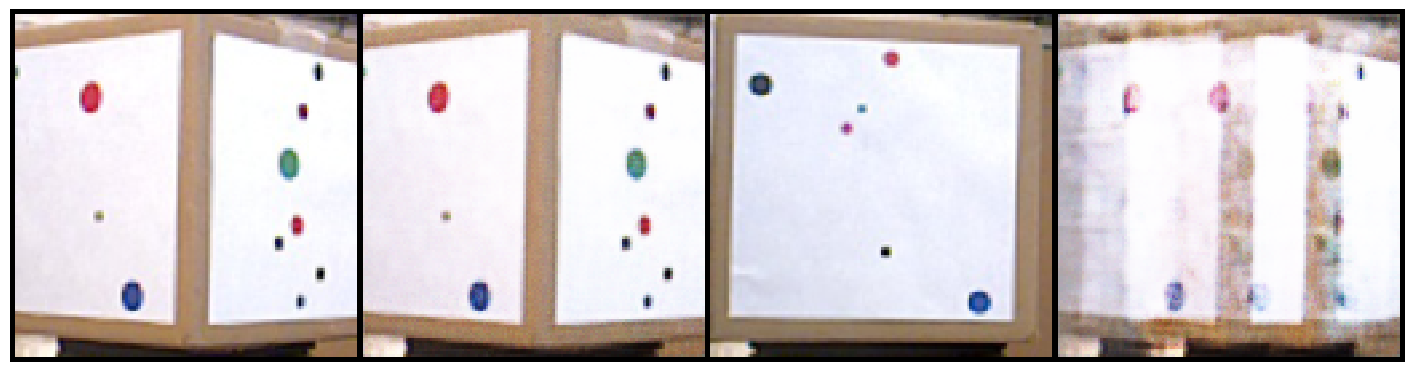

[0.01471753 0.05596455 0.01401398] [0.01423639 0.05557516 0.01371541] 0.01371541
[Observation: 4 Num Aspects: 3 min recon loss: 0.0137]
[0.02006644 0.05319174 0.01143785] [0.0195853  0.05280235 0.01113928] 0.011139282
[Observation: 5 Num Aspects: 3 min recon loss: 0.0111]
[0.02991844 0.05916813 0.01986554] [0.0294373  0.05877874 0.01956697] 0.019566972
[Observation: 6 Num Aspects: 3 min recon loss: 0.0196]
[0.03220277 0.00614261 0.04095733] [0.03172163 0.00575322 0.04065876] 0.0057532173
[Observation: 7 Num Aspects: 3 min recon loss: 0.0058]
[0.0215243  0.05544309 0.02452557] [0.02104316 0.0550537  0.024227  ] 0.021043159
[Observation: 8 Num Aspects: 3 min recon loss: 0.0210]
Creating aspect_3

Training aspect_autoencoder_3 ...
epoch 0 loss: 0.69385
epoch 1 loss: 0.38572
epoch 2 loss: 0.35285
epoch 3 loss: 0.34939
epoch 4 loss: 0.34827
Done training aspect_autoencoder_3


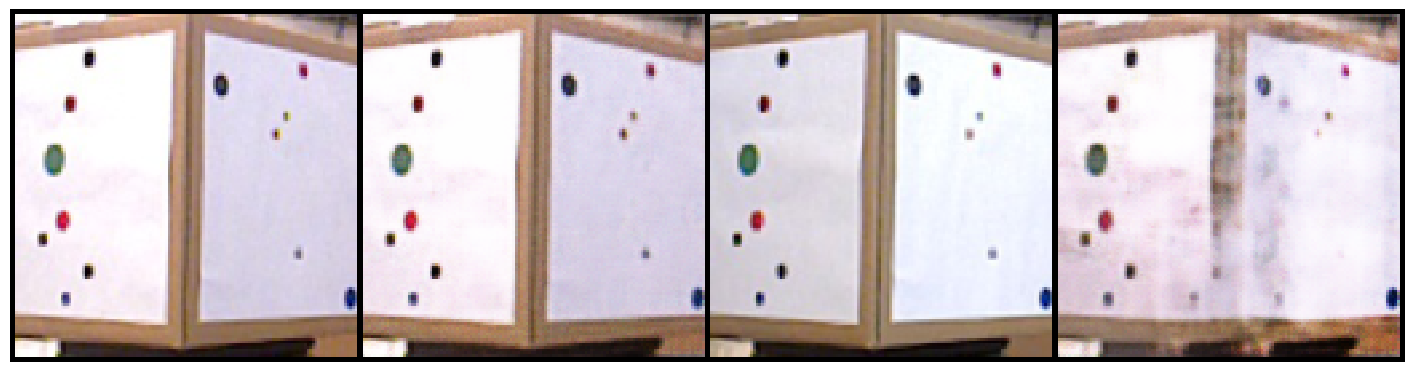

[0.0328487  0.00666606 0.04088942 0.04097351] [0.03236756 0.00627667 0.04059085 0.04057149] 0.0062766694
[Observation: 9 Num Aspects: 4 min recon loss: 0.0063]
[0.02354931 0.05423111 0.01261237 0.01322161] [0.02306817 0.05384172 0.0123138  0.01281959] 0.012313805
[Observation: 10 Num Aspects: 4 min recon loss: 0.0123]
[0.01358756 0.0480707  0.02092933 0.012954  ] [0.01310642 0.04768131 0.02063076 0.01255199] 0.012551986
[Observation: 11 Num Aspects: 4 min recon loss: 0.0126]
[0.03122271 0.0697953  0.02523135 0.00778332] [0.03074157 0.06940591 0.02493278 0.00738131] 0.007381308
[Observation: 12 Num Aspects: 4 min recon loss: 0.0074]
[0.02464623 0.05663714 0.01332902 0.01328915] [0.02416509 0.05624775 0.01303046 0.01288713] 0.012887133
[Observation: 13 Num Aspects: 4 min recon loss: 0.0129]
[0.02719873 0.05472627 0.02150019 0.00422117] [0.02671759 0.05433688 0.02120163 0.00381915] 0.0038191539
[Observation: 14 Num Aspects: 4 min recon loss: 0.0038]
[0.02725271 0.0564983  0.0245353  0.004

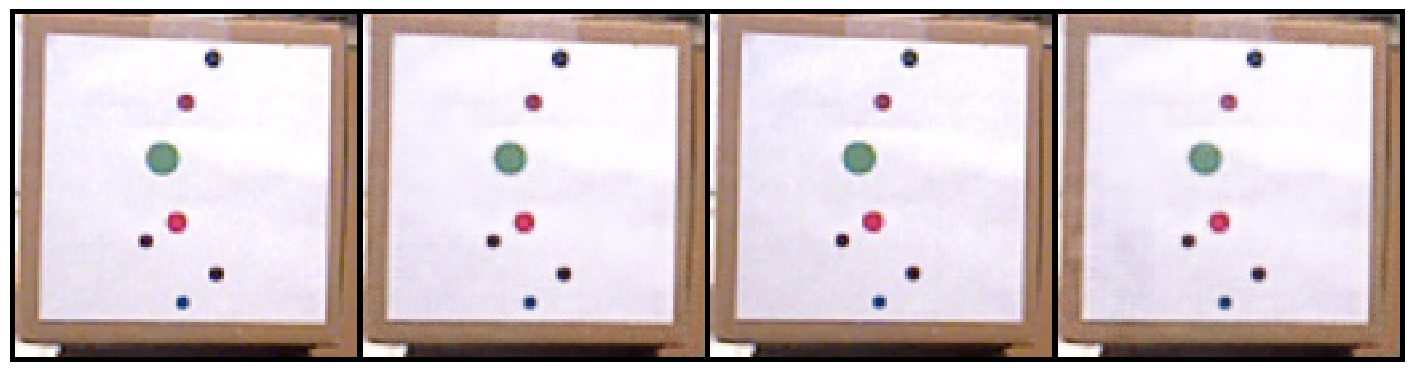

[0.01420695 0.05293797 0.01630199 0.02121914 0.04418975] [0.01372581 0.05254858 0.01600342 0.02081713 0.04391561] 0.013725808
[Observation: 19 Num Aspects: 5 min recon loss: 0.0137]
[0.01956392 0.05766811 0.00627207 0.01900956 0.05178913] [0.01908278 0.05727872 0.00597351 0.01860755 0.05151499] 0.0059735063
[Observation: 20 Num Aspects: 5 min recon loss: 0.0060]
[0.02584101 0.02424381 0.03505553 0.0299883  0.01757132] [0.02535987 0.02385442 0.03475697 0.02958629 0.01729718] 0.017297182
[Observation: 21 Num Aspects: 5 min recon loss: 0.0173]
[0.02362978 0.05369119 0.0124328  0.01315203 0.0459511 ] [0.02314864 0.0533018  0.01213423 0.01275001 0.04567696] 0.012134228
[Observation: 22 Num Aspects: 5 min recon loss: 0.0121]
[0.02678568 0.02587552 0.03477355 0.03114925 0.01650199] [0.02630454 0.02548613 0.03447499 0.03074724 0.01622785] 0.016227853
[Observation: 23 Num Aspects: 5 min recon loss: 0.0162]
[0.03011036 0.03501341 0.03763993 0.03516924 0.02278357] [0.02962922 0.03462402 0.0373413

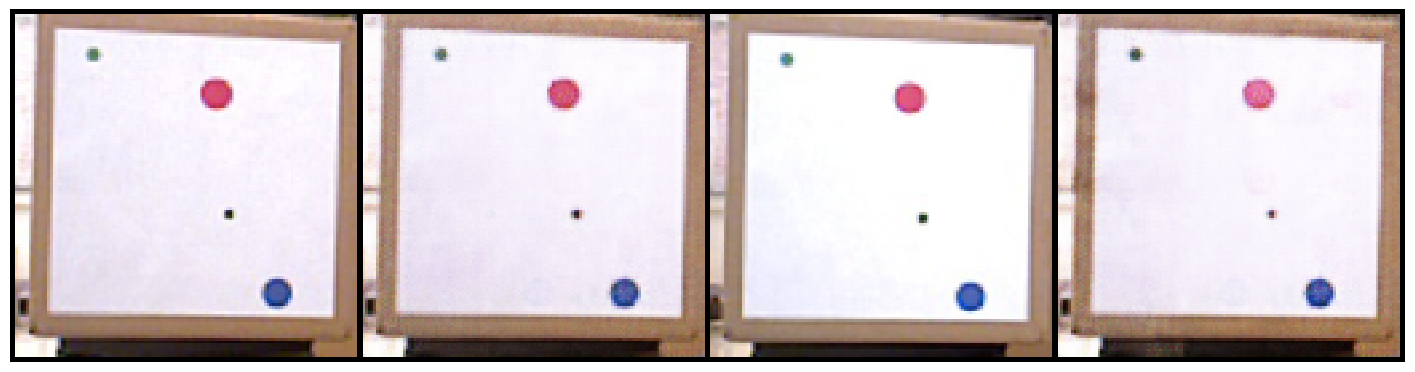

[0.02685676 0.06024578 0.00548906 0.02170673 0.05213088 0.04929395] [0.02637562 0.05985639 0.0051905  0.02130471 0.05185674 0.04893897] 0.0051904963
[Observation: 25 Num Aspects: 6 min recon loss: 0.0052]
[0.03015606 0.0570908  0.02047197 0.00770407 0.04926399 0.0414226 ] [0.02967492 0.05670141 0.0201734  0.00730206 0.04898985 0.04106762] 0.0073020575
[Observation: 26 Num Aspects: 6 min recon loss: 0.0073]
[0.02768916 0.0258376  0.03452201 0.03247809 0.01537734 0.00810026] [0.02720802 0.02544821 0.03422344 0.03207607 0.0151032  0.00774528] 0.0077452795
[Observation: 27 Num Aspects: 6 min recon loss: 0.0077]
[0.02602102 0.06230188 0.01590149 0.01674693 0.05065987 0.04639712] [0.02553988 0.06191249 0.01560292 0.01634491 0.05038573 0.04604214] 0.015602918
[Observation: 28 Num Aspects: 6 min recon loss: 0.0156]
[0.0298493  0.0008378  0.03985941 0.03480369 0.01444565 0.02512968] [0.02936816 0.00044841 0.03956085 0.03440168 0.01417151 0.0247747 ] 0.00044841078
[Observation: 29 Num Aspects: 6

[0.01756962 0.06397803 0.01767054 0.0228987  0.04684695 0.04670383] [0.01708848 0.06358864 0.01737198 0.02249669 0.04657281 0.04634885] 0.017088478
[Observation: 69 Num Aspects: 6 min recon loss: 0.0171]
[0.03174241 0.00409001 0.04055773 0.03896483 0.01189065 0.02852756] [0.03126127 0.00370062 0.04025916 0.03856282 0.01161651 0.02817258] 0.0037006221
[Observation: 70 Num Aspects: 6 min recon loss: 0.0037]
[0.01978873 0.05019787 0.01693179 0.01436024 0.04909858 0.04258469] [0.01930759 0.04980848 0.01663322 0.01395822 0.04882444 0.04222971] 0.013958223
[Observation: 71 Num Aspects: 6 min recon loss: 0.0140]
[0.01719684 0.0575587  0.0062019  0.02023497 0.05246338 0.04544529] [0.0167157  0.05716931 0.00590333 0.01983295 0.05218924 0.04509031] 0.0059033334
[Observation: 72 Num Aspects: 6 min recon loss: 0.0059]
[0.0367373  0.0247024  0.04372688 0.04267838 0.00191096 0.03037287] [0.03625616 0.02431301 0.04342832 0.04227637 0.00163682 0.03001789] 0.0016368161
[Observation: 73 Num Aspects: 6 m

[0.02709615 0.06610139 0.00286873 0.02453222 0.05377476 0.04998557] [0.02661501 0.065712   0.00257016 0.02413021 0.05350062 0.04963059] 0.0025701604
[Observation: 115 Num Aspects: 6 min recon loss: 0.0026]
[0.02670149 0.05640433 0.01168516 0.01484248 0.04660824 0.04028307] [0.02622035 0.05601494 0.01138659 0.01444046 0.0463341  0.03992809] 0.011386592
[Observation: 116 Num Aspects: 6 min recon loss: 0.0114]
[0.01320702 0.05706724 0.02007762 0.02286061 0.04627632 0.04375647] [0.01272589 0.05667785 0.01977906 0.0224586  0.04600218 0.04340149] 0.012725885
[Observation: 117 Num Aspects: 6 min recon loss: 0.0127]
[0.01602263 0.05495619 0.01420065 0.02003533 0.04394368 0.0381827 ] [0.01554149 0.0545668  0.01390208 0.01963332 0.04366954 0.03782772] 0.013902082
[Observation: 118 Num Aspects: 6 min recon loss: 0.0139]
[0.03382484 0.00830233 0.0417664  0.04210354 0.01311679 0.03105361] [0.0333437  0.00791294 0.04146783 0.04170153 0.01284265 0.03069863] 0.007912942
[Observation: 119 Num Aspects: 

[0.00690806 0.04774773 0.02085777 0.02021127 0.0465137  0.03912423] [0.00642692 0.04735835 0.0205592  0.01980925 0.04623956 0.03876925] 0.0064269174
[Observation: 159 Num Aspects: 6 min recon loss: 0.0064]
[0.00801555 0.04853627 0.02427269 0.02221315 0.04847826 0.0410482 ] [0.00753441 0.04814688 0.02397412 0.02181113 0.04820412 0.04069322] 0.0075344136
[Observation: 160 Num Aspects: 6 min recon loss: 0.0075]
[0.03182089 0.00471973 0.04039505 0.03926191 0.01193624 0.02871287] [0.03133975 0.00433034 0.04009649 0.0388599  0.0116621  0.02835789] 0.0043303417
[Observation: 161 Num Aspects: 6 min recon loss: 0.0043]
[0.01687883 0.04678361 0.01750365 0.01321269 0.04968173 0.04114524] [0.01639769 0.04639422 0.01720508 0.01281068 0.04940759 0.04079026] 0.012810678
[Observation: 162 Num Aspects: 6 min recon loss: 0.0128]
[0.03097794 0.05754961 0.00770023 0.0232133  0.05022105 0.04255227] [0.0304968  0.05716022 0.00740166 0.02281128 0.04994691 0.04219729] 0.0074016578
[Observation: 163 Num Aspect

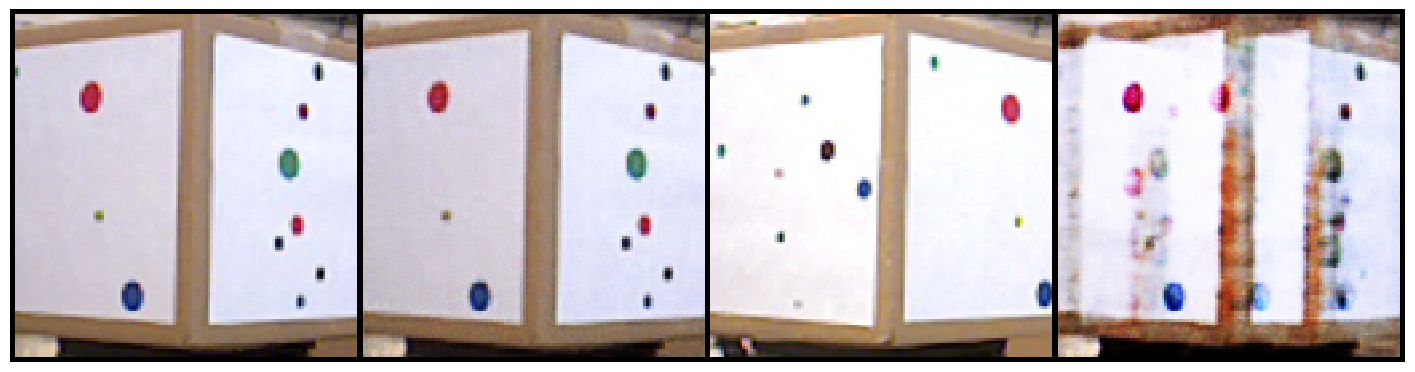

[0.03758772 0.02728133 0.04332723 0.04239514 0.00458086 0.03016438
 0.06233719] [0.03710658 0.02689194 0.04302866 0.04199313 0.00430672 0.0298094
 0.06202517] 0.0043067224
[Observation: 191 Num Aspects: 7 min recon loss: 0.0043]
[0.03603043 0.02632962 0.04284572 0.04178467 0.00228726 0.02896715
 0.06216739] [0.03554929 0.02594023 0.04254716 0.04138265 0.00201312 0.02861217
 0.06185537] 0.0020131161
[Observation: 192 Num Aspects: 7 min recon loss: 0.0020]
[0.03025917 0.05694689 0.00654676 0.02364489 0.05058006 0.04105965
 0.00467121] [0.02977803 0.0565575  0.00624819 0.02324288 0.05030592 0.04070467
 0.00435919] 0.0043591885
[Observation: 193 Num Aspects: 7 min recon loss: 0.0044]
[0.03225069 0.03289016 0.038301   0.03764568 0.01951629 0.01635023
 0.06087789] [0.03176956 0.03250077 0.03800244 0.03724366 0.01924215 0.01599525
 0.06056587] 0.015995247
[Observation: 194 Num Aspects: 7 min recon loss: 0.0160]
[0.03000054 0.01439924 0.04103558 0.03393561 0.0065388  0.02268304
 0.04967375] [0

[0.03301919 0.02387775 0.0408979  0.03805073 0.00138844 0.02429345
 0.05949456] [0.03253805 0.02348836 0.04059933 0.03764872 0.0011143  0.02393847
 0.05918254] 0.0011142972
[Observation: 233 Num Aspects: 7 min recon loss: 0.0011]
[0.0253974  0.03448582 0.03343189 0.03181873 0.01762605 0.01010843
 0.05743893] [0.02491626 0.03409643 0.03313332 0.03141671 0.01735191 0.00975345
 0.05712691] 0.009753451
[Observation: 234 Num Aspects: 7 min recon loss: 0.0098]
[0.03535703 0.02668523 0.04243375 0.04127546 0.00229222 0.02866271
 0.0625208 ] [0.03487589 0.02629584 0.04213519 0.04087345 0.00201808 0.02830773
 0.06220878] 0.0020180803
[Observation: 235 Num Aspects: 7 min recon loss: 0.0020]
[0.02441946 0.05718961 0.00120863 0.0205348  0.04897672 0.04348144
 0.00652579] [0.02393832 0.05680022 0.00091007 0.02013279 0.04870258 0.04312646
 0.00621377] 0.000910065
[Observation: 236 Num Aspects: 7 min recon loss: 0.0009]
[0.01303781 0.05045164 0.01376723 0.02063543 0.05515673 0.04675101
 0.02131481] [0

[0.01722358 0.05742844 0.0064358  0.01999585 0.05254051 0.04554082
 0.0240105 ] [0.01674244 0.05703905 0.00613723 0.01959384 0.05226637 0.04518584
 0.02369848] 0.0061372337
[Observation: 271 Num Aspects: 7 min recon loss: 0.0061]
[0.02865532 0.02865054 0.03472472 0.03464595 0.01521525 0.01019619
 0.05518523] [0.02817418 0.02826115 0.03442616 0.03424394 0.01494111 0.00984121
 0.05487321] 0.009841208
[Observation: 272 Num Aspects: 7 min recon loss: 0.0098]
[0.02737192 0.03012778 0.03472259 0.0333917  0.01583469 0.00871351
 0.05571072] [0.02689078 0.02973839 0.03442402 0.03298968 0.01556056 0.00835853
 0.0553987 ] 0.008358526
[Observation: 273 Num Aspects: 7 min recon loss: 0.0084]
[0.02818507 0.05404245 0.00551073 0.02171694 0.04885694 0.04144891
 0.00236214] [0.02770393 0.05365307 0.00521216 0.02131492 0.0485828  0.04109393
 0.00205012] 0.0020501204
[Observation: 274 Num Aspects: 7 min recon loss: 0.0021]
[0.02646471 0.05049437 0.01257136 0.01479882 0.04567276 0.03869339
 0.01837899] [0

[0.03568926 0.02679378 0.04278231 0.04156784 0.00230697 0.02925748
 0.06223111] [0.03520812 0.02640439 0.04248374 0.04116583 0.00203284 0.0289025
 0.06191909] 0.0020328355
[Observation: 313 Num Aspects: 7 min recon loss: 0.0020]
[0.01839131 0.05627264 0.00450266 0.02029668 0.05152583 0.04500009
 0.01551988] [0.01791018 0.05588325 0.00420409 0.01989467 0.05125169 0.04464512
 0.01520786] 0.004204089
[Observation: 314 Num Aspects: 7 min recon loss: 0.0042]
[0.03458858 0.00746983 0.04213777 0.04270149 0.01307515 0.03115367
 0.0613573 ] [0.03410744 0.00708044 0.0418392  0.04229947 0.01280101 0.03079869
 0.06104529] 0.0070804404
[Observation: 315 Num Aspects: 7 min recon loss: 0.0071]
[0.03361905 0.00416488 0.04046899 0.04038842 0.01256703 0.029073
 0.05626873] [0.03313791 0.00377549 0.04017042 0.03998641 0.01229289 0.02871802
 0.05595671] 0.003775492
[Observation: 316 Num Aspects: 7 min recon loss: 0.0038]
[0.0295832  0.01597703 0.04049042 0.03333824 0.00712877 0.02117499
 0.05064949] [0.02

[0.02877999 0.05946869 0.02131975 0.00326669 0.05169031 0.04424604
 0.03537041] [0.02829885 0.0590793  0.02102119 0.00286467 0.05141617 0.04389106
 0.03505839] 0.0028646726
[Observation: 352 Num Aspects: 7 min recon loss: 0.0029]
[0.03504034 0.00989061 0.04205486 0.0414638  0.01482935 0.02212361
 0.05732461] [0.0345592  0.00950123 0.04175629 0.04106179 0.01455521 0.02176863
 0.05701259] 0.009501225
[Observation: 353 Num Aspects: 7 min recon loss: 0.0095]
[0.03021808 0.00117469 0.03994902 0.03558646 0.01361705 0.02544954
 0.05422215] [0.02973694 0.0007853  0.03965046 0.03518444 0.01334291 0.02509456
 0.05391013] 0.0007853025
[Observation: 354 Num Aspects: 7 min recon loss: 0.0008]
[0.01767473 0.04610939 0.02094494 0.01335727 0.05107169 0.04286604
 0.03019563] [0.01719359 0.04572    0.02064637 0.01295526 0.05079755 0.04251106
 0.02988361] 0.0129552595
[Observation: 355 Num Aspects: 7 min recon loss: 0.0130]
[0.02782493 0.06475364 0.02205693 0.00572309 0.05179964 0.04508853
 0.04283258] [

[0.02677519 0.06396652 0.01648494 0.01756474 0.05125768 0.04736457
 0.03440514] [0.02629405 0.06357713 0.01618637 0.01716273 0.05098354 0.04700959
 0.03409312] 0.016186373
[Observation: 390 Num Aspects: 7 min recon loss: 0.0162]
[0.03090326 0.05370124 0.00987362 0.02250693 0.04925328 0.04150763
 0.0038175 ] [0.03042213 0.05331185 0.00957506 0.02210491 0.04897914 0.04115265
 0.00350548] 0.0035054754
[Observation: 391 Num Aspects: 7 min recon loss: 0.0035]
[0.03502225 0.00526551 0.04174744 0.0424174  0.01323724 0.03053203
 0.05864938] [0.03454111 0.00487612 0.04144887 0.04201538 0.0129631  0.03017705
 0.05833736] 0.004876124
[Observation: 392 Num Aspects: 7 min recon loss: 0.0049]
[0.03288259 0.02215785 0.04027307 0.03761485 0.00182953 0.022867
 0.05689953] [0.03240145 0.02176846 0.0399745  0.03721284 0.00155539 0.02251202
 0.05658751] 0.0015553877
[Observation: 393 Num Aspects: 7 min recon loss: 0.0016]
[0.03506126 0.02435824 0.04265408 0.04112472 0.0012756  0.02940377
 0.06226927] [0.0

[0.03690383 0.02436549 0.04229469 0.04122905 0.00349825 0.02801968
 0.05931403] [0.03642269 0.0239761  0.04199612 0.04082704 0.00322411 0.0276647
 0.05900202] 0.0032241123
[Observation: 428 Num Aspects: 7 min recon loss: 0.0032]
[0.02593982 0.02222672 0.0357244  0.0306866  0.0155774  0.00871401
 0.05055046] [0.02545868 0.02183733 0.03542583 0.03028458 0.01530326 0.00835903
 0.05023844] 0.008359032
[Observation: 429 Num Aspects: 7 min recon loss: 0.0084]
[0.02462785 0.05831885 0.01641425 0.01631901 0.04950338 0.04569301
 0.03021482] [0.02414671 0.05792946 0.01611568 0.015917   0.04922924 0.04533803
 0.0299028 ] 0.015916996
[Observation: 430 Num Aspects: 7 min recon loss: 0.0159]
[0.02233469 0.05487641 0.02460332 0.0016216  0.05177599 0.04510146
 0.04520252] [0.02185355 0.05448702 0.02430475 0.00121959 0.05150185 0.04474648
 0.0448905 ] 0.0012195888
[Observation: 431 Num Aspects: 7 min recon loss: 0.0012]
[0.01936779 0.05125071 0.02887802 0.00231849 0.05787445 0.05164925
 0.04241318] [0.

[0.0166235  0.05600901 0.00691015 0.02018598 0.05246233 0.04482249
 0.02317962] [0.01614236 0.05561962 0.00661158 0.01978397 0.05218819 0.04446751
 0.0228676 ] 0.0066115777
[Observation: 469 Num Aspects: 7 min recon loss: 0.0066]
[0.03565132 0.02215329 0.04227501 0.04077698 0.00087316 0.02828827
 0.0596785 ] [0.03517018 0.0217639  0.04197644 0.04037496 0.00059902 0.02793329
 0.05936648] 0.00059902
[Observation: 470 Num Aspects: 7 min recon loss: 0.0006]
[0.01154676 0.04812109 0.0158525  0.01830416 0.04245287 0.03608101
 0.02498986] [0.01106562 0.0477317  0.01555394 0.01790215 0.04217873 0.03572603
 0.02467784] 0.011065617
[Observation: 471 Num Aspects: 7 min recon loss: 0.0111]
[0.02897948 0.05324163 0.01366046 0.01640614 0.04682856 0.03911427
 0.01865284] [0.02849834 0.05285224 0.01336189 0.01600413 0.04655442 0.03875929
 0.01834082] 0.013361894
[Observation: 472 Num Aspects: 7 min recon loss: 0.0134]
[0.02711737 0.06576059 0.01708531 0.01851085 0.05093898 0.04818291
 0.03736581] [0.0

[0.00091343 0.045444   0.02496528 0.02161508 0.04961405 0.04287904
 0.03904521] [0.00043229 0.04505461 0.02466671 0.02121306 0.04933991 0.04252406
 0.0387332 ] 0.00043229337
[Observation: 508 Num Aspects: 7 min recon loss: 0.0004]
[0.0380522  0.02728053 0.04372196 0.04317098 0.00541758 0.03091723
 0.06312268] [0.03757106 0.02689114 0.0434234  0.04276896 0.00514345 0.03056225
 0.06281066] 0.005143446
[Observation: 509 Num Aspects: 7 min recon loss: 0.0051]
[0.02050335 0.04941735 0.02880433 0.00738433 0.05962491 0.05356803
 0.03869626] [0.02002221 0.04902796 0.02850576 0.00698231 0.05935077 0.05321305
 0.03838424] 0.0069823116
[Observation: 510 Num Aspects: 7 min recon loss: 0.0070]
[0.03159609 0.0539552  0.02380842 0.01152363 0.04831297 0.04050374
 0.02785858] [0.03111495 0.05356581 0.02350985 0.01112161 0.04803883 0.04014876
 0.02754656] 0.011121612
[Observation: 511 Num Aspects: 7 min recon loss: 0.0111]
[0.0035739  0.05077872 0.0220193  0.02011619 0.04618188 0.04022268
 0.04339104] [

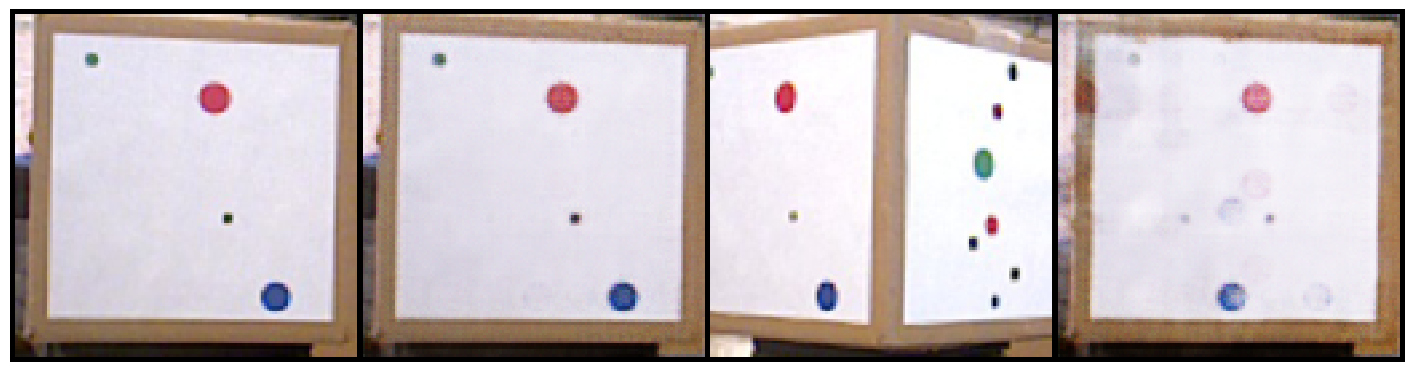

[0.03197043 0.00188762 0.0394931  0.03694501 0.01291053 0.02669052
 0.05109209 0.02026198] [0.03148929 0.00149823 0.03919453 0.03654299 0.01263639 0.02633554
 0.05078007 0.0198386 ] 0.0014982335
[Observation: 527 Num Aspects: 8 min recon loss: 0.0015]
[0.0207782  0.05023828 0.02957587 0.00448104 0.05699751 0.05155848
 0.04301496 0.0475157 ] [0.02029706 0.04984889 0.0292773  0.00407902 0.05672337 0.0512035
 0.04270294 0.04709232] 0.004079021
[Observation: 528 Num Aspects: 8 min recon loss: 0.0041]
[0.02474412 0.05729551 0.01284346 0.01379    0.04730839 0.04171063
 0.02566235 0.04481784] [0.02426298 0.05690612 0.01254489 0.01338799 0.04703425 0.04135565
 0.02535033 0.04439446] 0.01254489
[Observation: 529 Num Aspects: 8 min recon loss: 0.0125]
[0.02589625 0.05956403 0.00072479 0.02153792 0.05025682 0.04419095
 0.00626625 0.04742161] [0.02541511 0.05917464 0.00042622 0.0211359  0.04998268 0.04383597
 0.00595423 0.04699823] 0.0004262241
[Observation: 530 Num Aspects: 8 min recon loss: 0.00

[0.02982758 0.05710528 0.02208132 0.00758039 0.05049673 0.04056355
 0.03272324 0.04588774] [0.02934644 0.05671589 0.02178275 0.00717838 0.05022259 0.04020857
 0.03241122 0.04546436] 0.0071783755
[Observation: 561 Num Aspects: 8 min recon loss: 0.0072]
[0.02916538 0.05075034 0.01814311 0.01716026 0.04688217 0.03922597
 0.01587623 0.03805788] [0.02868424 0.05036095 0.01784454 0.01675824 0.04660803 0.03887099
 0.01556421 0.0376345 ] 0.01556421
[Observation: 562 Num Aspects: 8 min recon loss: 0.0156]
[0.02669997 0.02562214 0.03568074 0.03194698 0.01516468 0.00803115
 0.05211831 0.01069078] [0.02621883 0.02523275 0.03538217 0.03154497 0.01489054 0.00767617
 0.05180629 0.0102674 ] 0.007676167
[Observation: 563 Num Aspects: 8 min recon loss: 0.0077]
[0.03678502 0.02209911 0.04312246 0.04241627 0.00177812 0.02782408
 0.05999084 0.02132406] [0.03630388 0.02170972 0.04282389 0.04201426 0.00150398 0.0274691
 0.05967882 0.02090068] 0.0015039798
[Observation: 564 Num Aspects: 8 min recon loss: 0.00

[0.01280133 0.04755271 0.02227487 0.01411784 0.05357204 0.04640916
 0.03568115 0.04705064] [0.01232019 0.04716332 0.0219763  0.01371583 0.0532979  0.04605418
 0.03536914 0.04662726] 0.012320192
[Observation: 594 Num Aspects: 8 min recon loss: 0.0123]
[0.02893927 0.06281839 0.00295979 0.02150515 0.05049408 0.04554555
 0.01570928 0.04803832] [0.02845813 0.062429   0.00266122 0.02110314 0.05021994 0.04519057
 0.01539726 0.04761494] 0.002661222
[Observation: 595 Num Aspects: 8 min recon loss: 0.0027]
[0.02666985 0.025247   0.03567455 0.03190879 0.0151288  0.0081129
 0.05176208 0.01050815] [0.02618871 0.02485761 0.03537599 0.03150677 0.01485466 0.00775792
 0.05145006 0.01008477] 0.007757922
[Observation: 596 Num Aspects: 8 min recon loss: 0.0078]
[0.03169149 0.00510648 0.0401804  0.03890817 0.01104458 0.02781598
 0.05903902 0.02315819] [0.03121035 0.00471709 0.03988184 0.03850615 0.01077044 0.027461
 0.058727   0.0227348 ] 0.0047170925
[Observation: 597 Num Aspects: 8 min recon loss: 0.0047

[0.02705285 0.03144466 0.03470399 0.03326582 0.01624447 0.00897996
 0.05721326 0.01165295] [0.02657171 0.03105527 0.03440542 0.0328638  0.01597033 0.00862498
 0.05690124 0.01122957] 0.0086249765
[Observation: 628 Num Aspects: 8 min recon loss: 0.0086]
[0.02585404 0.05123484 0.02157588 0.00398773 0.0480874  0.04184224
 0.0314653  0.04188938] [0.0253729  0.05084545 0.02127731 0.00358572 0.04781326 0.04148726
 0.03115328 0.041466  ] 0.0035857188
[Observation: 629 Num Aspects: 8 min recon loss: 0.0036]
[0.01674808 0.04979912 0.01467414 0.01870066 0.04269921 0.03578794
 0.0216103  0.03801953] [0.01626694 0.04940973 0.01437558 0.01829864 0.04242507 0.03543296
 0.02129828 0.03759615] 0.014375578
[Observation: 630 Num Aspects: 8 min recon loss: 0.0144]
[0.03394514 0.00318075 0.03987531 0.03799266 0.01516271 0.0283888
 0.05011218 0.01789746] [0.033464   0.00279137 0.03957674 0.03759065 0.01488857 0.02803382
 0.04980016 0.01747408] 0.0027913656
[Observation: 631 Num Aspects: 8 min recon loss: 0.

[0.02983184 0.03669522 0.0368773  0.03574051 0.01996475 0.01457674
 0.05988187 0.01028474] [0.0293507  0.03630583 0.03657873 0.03533849 0.01969061 0.01422177
 0.05956985 0.00986136] 0.009861356
[Observation: 662 Num Aspects: 8 min recon loss: 0.0099]
[0.00069237 0.04543238 0.02482358 0.0216499  0.05002388 0.0430723
 0.03878393 0.04561615] [0.00021123 0.04504299 0.02452501 0.02124788 0.04974974 0.04271732
 0.03847191 0.04519277] 0.00021122894
[Observation: 663 Num Aspects: 8 min recon loss: 0.0002]
[0.0288128  0.05044197 0.01736048 0.01679775 0.0465237  0.03876803
 0.01574578 0.03779304] [0.02833166 0.05005258 0.01706191 0.01639573 0.04624956 0.03841305
 0.01543376 0.03736966] 0.015433758
[Observation: 664 Num Aspects: 8 min recon loss: 0.0154]
[0.03533523 0.01184849 0.04283775 0.04356372 0.01558631 0.02489964
 0.0608799  0.02590871] [0.03485409 0.0114591  0.04253918 0.04316171 0.01531217 0.02454466
 0.06056788 0.02548533] 0.011459104
[Observation: 665 Num Aspects: 8 min recon loss: 0.0

[0.0331634  0.00661086 0.04112324 0.04131803 0.01242606 0.03020486
 0.06116015 0.02395442] [0.03268226 0.00622148 0.04082468 0.04091601 0.01215192 0.02984989
 0.06084813 0.02353104] 0.006221476
[Observation: 698 Num Aspects: 8 min recon loss: 0.0062]
[0.0298628  0.06788421 0.02434407 0.00789982 0.05419514 0.0482605
 0.04561706 0.04808277] [0.02938166 0.06749482 0.0240455  0.0074978  0.053921   0.04790552
 0.04530504 0.04765939] 0.007497801
[Observation: 699 Num Aspects: 8 min recon loss: 0.0075]
[0.03094596 0.05353583 0.01028839 0.02256657 0.04929515 0.04152266
 0.00382198 0.04208793] [0.03046482 0.05314644 0.00998982 0.02216455 0.04902101 0.04116768
 0.00350996 0.04166456] 0.003509964
[Observation: 700 Num Aspects: 8 min recon loss: 0.0035]
[0.02115989 0.0468738  0.01378875 0.01257261 0.04515865 0.03859366
 0.02117873 0.03874078] [0.02067875 0.04648441 0.01349019 0.01217059 0.04488451 0.03823869
 0.02086671 0.0383174 ] 0.012170594
[Observation: 701 Num Aspects: 8 min recon loss: 0.012

 0.00422943 0.04528584] [0.02807858 0.05832537 0.00203286 0.02180454 0.04975423 0.04278271
 0.00391741 0.04486246] 0.0020328618
[Observation: 735 Num Aspects: 8 min recon loss: 0.0020]
[0.02919455 0.0513734  0.01706016 0.01699991 0.04693961 0.03941578
 0.01669605 0.03858483] [0.02871341 0.05098401 0.01676159 0.0165979  0.04666547 0.0390608
 0.01638403 0.03816145] 0.016384032
[Observation: 736 Num Aspects: 8 min recon loss: 0.0164]
[0.03219229 0.00809808 0.04069895 0.04072371 0.01260212 0.03027454
 0.06160012 0.02473415] [0.03171115 0.00770869 0.04040038 0.0403217  0.01232798 0.02991956
 0.0612881  0.02431077] 0.007708695
[Observation: 737 Num Aspects: 8 min recon loss: 0.0077]
[0.02841622 0.02658222 0.03584708 0.03508242 0.01423335 0.00782084
 0.05394979 0.010608  ] [0.02793508 0.02619283 0.03554851 0.03468041 0.01395921 0.00746586
 0.05363777 0.01018462] 0.0074658566
[Observation: 738 Num Aspects: 8 min recon loss: 0.0075]
[0.02934426 0.00070191 0.03897345 0.03401402 0.0150497  0.0250

[0.01912826 0.05001472 0.01863437 0.02055888 0.04430314 0.03612464
 0.01968423 0.0368425 ] [0.01864712 0.04962533 0.01833581 0.02015687 0.044029   0.03576966
 0.01937221 0.03641912] 0.018335806
[Observation: 768 Num Aspects: 8 min recon loss: 0.0183]
[0.03039029 0.05192925 0.02182223 0.00771254 0.04865031 0.04069436
 0.02606651 0.04090434] [0.02990915 0.05153986 0.02152366 0.00731052 0.04837617 0.04033938
 0.02575449 0.04048096] 0.0073105246
[Observation: 769 Num Aspects: 8 min recon loss: 0.0073]
[0.02813167 0.02829957 0.03492398 0.03452968 0.0145588  0.00982235
 0.05581593 0.00888329] [0.02765053 0.02791018 0.03462541 0.03412766 0.01428466 0.00946737
 0.05550391 0.00845991] 0.008459905
[Observation: 770 Num Aspects: 8 min recon loss: 0.0085]
[0.02252621 0.05090614 0.02491194 0.00205096 0.05208889 0.04493041
 0.0382264  0.04453585] [0.02204507 0.05051675 0.02461338 0.00164894 0.05181475 0.04457543
 0.03791438 0.04411247] 0.0016489429
[Observation: 771 Num Aspects: 8 min recon loss: 0.

[0.03343604 0.02678689 0.04151831 0.04000729 0.00214505 0.02973021
 0.06260433 0.0253277 ] [0.0329549  0.0263975  0.04121974 0.03960527 0.00187091 0.02937523
 0.06229231 0.02490432] 0.0018709092
[Observation: 802 Num Aspects: 8 min recon loss: 0.0019]
[0.01600425 0.05085721 0.00890565 0.01895164 0.05195738 0.04278249
 0.01355506 0.04542133] [0.01552311 0.05046782 0.00860709 0.01854963 0.05168324 0.04242751
 0.01324304 0.04499795] 0.008607086
[Observation: 803 Num Aspects: 8 min recon loss: 0.0086]
[0.03163497 0.02142001 0.03592939 0.03456235 0.01902086 0.01866878
 0.04962236 0.00404742] [0.03115383 0.02103062 0.03563082 0.03416033 0.01874672 0.0183138
 0.04931035 0.00362404] 0.0036240409
[Observation: 804 Num Aspects: 8 min recon loss: 0.0036]
[0.03307514 0.02372914 0.04083783 0.03806896 0.00139938 0.02427835
 0.05973687 0.02096361] [0.032594   0.02333975 0.04053926 0.03766694 0.00112524 0.02392337
 0.05942485 0.02054022] 0.0011252405
[Observation: 805 Num Aspects: 8 min recon loss: 0.

[0.03145899 0.00923177 0.04029963 0.04028637 0.01298799 0.03070128
 0.06186121 0.02552757] [0.03097785 0.00884238 0.04000106 0.03988436 0.01271385 0.0303463
 0.06154919 0.02510419] 0.0088423835
[Observation: 840 Num Aspects: 8 min recon loss: 0.0088]
[0.02832481 0.02778861 0.03496427 0.03438618 0.01464828 0.00944698
 0.05502932 0.00831886] [0.02784367 0.02739922 0.03466571 0.03398417 0.01437414 0.009092
 0.0547173  0.00789548] 0.00789548
[Observation: 841 Num Aspects: 8 min recon loss: 0.0079]
[0.03245983 0.0037807  0.04015129 0.03898698 0.01162463 0.02783114
 0.05628601 0.0219649 ] [0.03197869 0.00339131 0.03985272 0.03858497 0.01135049 0.02747616
 0.05597399 0.02154152] 0.0033913138
[Observation: 842 Num Aspects: 8 min recon loss: 0.0034]
[0.02408309 0.05506011 0.00172258 0.02017456 0.04911664 0.0428478
 0.00482342 0.04467825] [0.02360195 0.05467072 0.00142402 0.01977254 0.0488425  0.04249282
 0.0045114  0.04425487] 0.0014240167
[Observation: 843 Num Aspects: 8 min recon loss: 0.0014

[0.02639309 0.0314793  0.0346769  0.03363355 0.01497907 0.01219566
 0.05771349 0.01369334] [0.02591195 0.03108991 0.03437833 0.03323154 0.01470493 0.01184068
 0.05740147 0.01326996] 0.011840676
[Observation: 876 Num Aspects: 8 min recon loss: 0.0118]
[0.02073145 0.05827247 0.01896828 0.02616746 0.04621554 0.03840629
 0.03548189 0.04308242] [0.02025031 0.05788308 0.01866971 0.02576544 0.0459414  0.03805131
 0.03516987 0.04265904] 0.018669711
[Observation: 877 Num Aspects: 8 min recon loss: 0.0187]
[0.03477566 0.00398797 0.04029934 0.03835581 0.01689549 0.0295921
 0.04965781 0.01730753] [0.03429452 0.00359859 0.04000077 0.03795379 0.01662135 0.02923712
 0.04934579 0.01688415] 0.003598585
[Observation: 878 Num Aspects: 8 min recon loss: 0.0036]
[0.03204334 0.05503745 0.02299701 0.00925341 0.04957255 0.0414634
 0.02790933 0.04173669] [0.0315622  0.05464806 0.02269844 0.00885139 0.04929841 0.04110843
 0.02759731 0.04131331] 0.008851392
[Observation: 879 Num Aspects: 8 min recon loss: 0.0089

[0.03513441 0.00973846 0.04256126 0.04312665 0.01445546 0.03267069
 0.06223089 0.02196345] [0.03465327 0.00934907 0.04226269 0.04272464 0.01418133 0.03231571
 0.06191887 0.02154007] 0.009349069
[Observation: 911 Num Aspects: 8 min recon loss: 0.0093]
[0.00410541 0.04684567 0.02081423 0.01901135 0.04554306 0.03785494
 0.03390482 0.04191311] [0.00362427 0.04645628 0.02051567 0.01860934 0.04526892 0.03749996
 0.0335928  0.04148974] 0.00362427
[Observation: 912 Num Aspects: 8 min recon loss: 0.0036]
[0.02792272 0.02921266 0.03506517 0.03437116 0.01478368 0.01008382
 0.0564907  0.00962847] [0.02744158 0.02882327 0.0347666  0.03396914 0.01450954 0.00972884
 0.05617868 0.00920509] 0.009205091
[Observation: 913 Num Aspects: 8 min recon loss: 0.0092]
[0.02684202 0.05862815 0.0132254  0.01613313 0.04821924 0.0404133
 0.02658092 0.04380526] [0.02636088 0.05823876 0.01292683 0.01573112 0.0479451  0.04005832
 0.0262689  0.04338188] 0.012926829
[Observation: 914 Num Aspects: 8 min recon loss: 0.0129

[0.0378015  0.02676458 0.04458793 0.0433476  0.00401737 0.03209206
 0.063468   0.02099589] [0.03732036 0.02637519 0.04428936 0.04294558 0.00374323 0.03173709
 0.06315598 0.02057251] 0.0037432348
[Observation: 946 Num Aspects: 8 min recon loss: 0.0037]
[0.02421447 0.05703294 0.01698229 0.01652778 0.0491748  0.04552574
 0.02994861 0.04176662] [0.02373333 0.05664355 0.01668373 0.01612577 0.04890066 0.04517076
 0.02963659 0.04134325] 0.016125768
[Observation: 947 Num Aspects: 8 min recon loss: 0.0161]
[0.03738192 0.02147163 0.04114792 0.04055578 0.00764771 0.02888014
 0.05466249 0.01549476] [0.03690078 0.02108224 0.04084936 0.04015376 0.00737357 0.02852516
 0.05435047 0.01507138] 0.0073735677
[Observation: 948 Num Aspects: 8 min recon loss: 0.0074]
[0.03398515 0.00326516 0.03976881 0.03804101 0.01503243 0.02840792
 0.05044238 0.01789063] [0.03350401 0.00287577 0.03947024 0.037639   0.01475829 0.02805294
 0.05013036 0.01746725] 0.0028757672
[Observation: 949 Num Aspects: 8 min recon loss: 0

[0.03363669 0.00766931 0.04147212 0.04224094 0.01327292 0.02891565
 0.06116625 0.02365315] [0.03315555 0.00727992 0.04117355 0.04183893 0.01299878 0.02856067
 0.06085423 0.02322977] 0.007279923
[Observation: 981 Num Aspects: 8 min recon loss: 0.0073]
[0.03562995 0.02649678 0.04299862 0.04202579 0.00853524 0.02140478
 0.06245259 0.02044646] [0.03514881 0.02610739 0.04270005 0.04162377 0.0082611  0.0210498
 0.06214057 0.02002308] 0.0082611
[Observation: 982 Num Aspects: 8 min recon loss: 0.0083]
[0.03147276 0.00291537 0.04020496 0.03788053 0.01189843 0.02650064
 0.05614728 0.02188487] [0.03099163 0.00252598 0.0399064  0.03747851 0.01162429 0.02614566
 0.05583526 0.02146149] 0.0025259843
[Observation: 983 Num Aspects: 8 min recon loss: 0.0025]
[0.02751976 0.02848771 0.03453476 0.03289391 0.01578024 0.00777844
 0.05317882 0.00917175] [0.02703862 0.02809832 0.03423619 0.0324919  0.0155061  0.00742346
 0.0528668  0.00874837] 0.0074234605
[Observation: 984 Num Aspects: 8 min recon loss: 0.007

[0.02619891 0.06251523 0.01613792 0.01662219 0.05056014 0.04654142
 0.03269679 0.04528442] [0.02571777 0.06212584 0.01583935 0.01622017 0.050286   0.04618644
 0.03238478 0.04486104] 0.01583935
[Observation: 1019 Num Aspects: 8 min recon loss: 0.0158]
[0.03021115 0.05679007 0.00662561 0.02365299 0.05047318 0.04085346
 0.00485309 0.04418879] [0.02973001 0.05640068 0.00632704 0.02325098 0.05019904 0.04049848
 0.00454107 0.04376541] 0.0045410716
[Observation: 1020 Num Aspects: 8 min recon loss: 0.0045]
[0.03329796 0.00249377 0.03997551 0.03875176 0.01328977 0.02770944
 0.05131759 0.0203025 ] [0.03281682 0.00210438 0.03967694 0.03834974 0.01301563 0.02735446
 0.05100558 0.01987912] 0.0021043813
[Observation: 1021 Num Aspects: 8 min recon loss: 0.0021]
[0.02348348 0.05846988 0.02396122 0.00197226 0.05097376 0.04557955
 0.04542707 0.04928031] [0.02300234 0.05808049 0.02366266 0.00157025 0.05069962 0.04522457
 0.04511505 0.04885693] 0.0015702492
[Observation: 1022 Num Aspects: 8 min recon loss

[0.02748325 0.03083127 0.03429548 0.03342812 0.01561998 0.01062971
 0.0554111  0.00943471] [0.02700211 0.03044188 0.03399692 0.03302611 0.01534584 0.01027473
 0.05509908 0.00901133] 0.009011333
[Observation: 1054 Num Aspects: 8 min recon loss: 0.0090]
[0.02566827 0.05933451 0.00122408 0.02184316 0.05027544 0.04452671
 0.00708316 0.04762325] [0.02518713 0.05894512 0.00092551 0.02144114 0.0500013  0.04417174
 0.00677114 0.04719988] 0.00092551403
[Observation: 1055 Num Aspects: 8 min recon loss: 0.0009]
[0.02968844 0.06193016 0.02486381 0.00535798 0.05293661 0.04799023
 0.0410938  0.045022  ] [0.0292073  0.06154077 0.02456524 0.00495597 0.05266247 0.04763525
 0.04078178 0.04459862] 0.0049559665
[Observation: 1056 Num Aspects: 8 min recon loss: 0.0050]
[0.0295555  0.00072674 0.03919512 0.03402146 0.01488223 0.02495542
 0.05408527 0.01926802] [0.02907436 0.00033735 0.03889655 0.03361944 0.01460809 0.02460044
 0.05377325 0.01884464] 0.00033734806
[Observation: 1057 Num Aspects: 8 min recon l

[0.03097965 0.0019278  0.04010746 0.03681167 0.01303614 0.0262137
 0.05424686 0.02128881] [0.03049851 0.00153841 0.03980889 0.03640965 0.01276201 0.02585872
 0.05393484 0.02086543] 0.0015384085
[Observation: 1089 Num Aspects: 8 min recon loss: 0.0015]
[0.014411   0.05178824 0.01476227 0.01904125 0.04310536 0.03603614
 0.02561673 0.04088373] [0.01392986 0.05139885 0.0144637  0.01863923 0.04283122 0.03568116
 0.02530471 0.04046036] 0.013929862
[Observation: 1090 Num Aspects: 8 min recon loss: 0.0139]
[0.0338303  0.00404817 0.04055117 0.04043566 0.01265918 0.02922349
 0.05621801 0.02204063] [0.03334916 0.00365878 0.0402526  0.04003365 0.01238504 0.02886851
 0.05590599 0.02161725] 0.003658782
[Observation: 1091 Num Aspects: 8 min recon loss: 0.0037]
[0.02792745 0.00050533 0.0415547  0.03234192 0.01956946 0.02604441
 0.05246053 0.01868671] [0.02744631 0.00011594 0.04125614 0.03193991 0.01929532 0.02568943
 0.05214851 0.01826333] 0.000115936185
[Observation: 1092 Num Aspects: 8 min recon los

[0.01675024 0.05154226 0.01405319 0.01859342 0.04285715 0.03658516
 0.02322336 0.03900521] [0.0162691  0.05115287 0.01375463 0.0181914  0.04258301 0.03623018
 0.02291134 0.03858183] 0.013754627
[Observation: 1124 Num Aspects: 8 min recon loss: 0.0138]
[0.0127994  0.0495343  0.01424135 0.02165646 0.05578578 0.0475624
 0.02048594 0.04898697] [0.01231826 0.04914491 0.01394278 0.02125445 0.05551163 0.04720742
 0.02017392 0.04856359] 0.012318261
[Observation: 1125 Num Aspects: 8 min recon loss: 0.0123]
[0.03573018 0.03053997 0.04275535 0.04179935 0.00596115 0.03128926
 0.06411246 0.02134277] [0.03524904 0.03015058 0.04245679 0.04139734 0.00568701 0.03093429
 0.06380044 0.02091939] 0.0056870105
[Observation: 1126 Num Aspects: 8 min recon loss: 0.0057]
[0.02902893 0.02980912 0.0363725  0.03485093 0.01800324 0.00326299
 0.05427617 0.01158651] [0.02854779 0.02941973 0.03607393 0.03444891 0.0177291  0.00290801
 0.05396415 0.01116313] 0.0029080082
[Observation: 1127 Num Aspects: 8 min recon loss:

[0.03518904 0.02952828 0.03933285 0.04026004 0.01844861 0.01984963
 0.05929178 0.00558132] [0.0347079  0.02913889 0.03903428 0.03985802 0.01817447 0.01949465
 0.05897976 0.00515794] 0.0051579364
[Observation: 1160 Num Aspects: 8 min recon loss: 0.0052]
[0.03694956 0.02575769 0.04307365 0.04233065 0.00362727 0.02972989
 0.06287882 0.02038623] [0.03646842 0.0253683  0.04277508 0.04192863 0.00335313 0.02937491
 0.06256679 0.01996285] 0.0033531291
[Observation: 1161 Num Aspects: 8 min recon loss: 0.0034]
[0.01673597 0.05378811 0.01437372 0.0197372  0.04409866 0.03769485
 0.02504745 0.04050195] [0.01625483 0.05339872 0.01407515 0.01933518 0.04382452 0.03733987
 0.02473543 0.04007857] 0.014075153
[Observation: 1162 Num Aspects: 8 min recon loss: 0.0141]
[0.02689505 0.05880395 0.01330562 0.01620063 0.04822138 0.04056439
 0.02636943 0.04382801] [0.02641391 0.05841456 0.01300705 0.01579861 0.04794724 0.04020941
 0.02605741 0.04340464] 0.0130070485
[Observation: 1163 Num Aspects: 8 min recon los

[0.01851814 0.04690186 0.02171779 0.0143549  0.05204143 0.04414148
 0.03023512 0.03769188] [0.018037   0.04651247 0.02141922 0.01395288 0.05176729 0.0437865
 0.02992311 0.0372685 ] 0.013952882
[Observation: 1197 Num Aspects: 8 min recon loss: 0.0140]
[0.02659117 0.03092364 0.0351476  0.03215114 0.01732978 0.00725743
 0.05720508 0.0120739 ] [0.02611003 0.03053425 0.03484903 0.03174913 0.01705564 0.00690245
 0.05689306 0.01165052] 0.0069024507
[Observation: 1198 Num Aspects: 8 min recon loss: 0.0069]
[0.03194354 0.0018207  0.0400064  0.03704723 0.01278422 0.02661903
 0.0512802  0.0203454 ] [0.0314624  0.00143131 0.03970783 0.03664522 0.01251008 0.02626405
 0.05096818 0.01992202] 0.0014313073
[Observation: 1199 Num Aspects: 8 min recon loss: 0.0014]
[0.0299695  0.06949906 0.00646355 0.02485493 0.05400107 0.05217793
 0.02389022 0.04917961] [0.02948836 0.06910967 0.00616498 0.02445291 0.05372693 0.05182295
 0.0235782  0.04875623] 0.006164979
[Observation: 1200 Num Aspects: 8 min recon loss:

[0.03545703 0.0300277  0.04306678 0.04192092 0.00506261 0.03237418
 0.06347392 0.02288652] [0.03497589 0.02963831 0.04276822 0.0415189  0.00478847 0.03201921
 0.06316189 0.02246314] 0.0047884732
[Observation: 1233 Num Aspects: 8 min recon loss: 0.0048]
[0.03016644 0.05906012 0.00390064 0.02142779 0.05011017 0.04414259
 0.00825588 0.04591201] [0.0296853  0.05867073 0.00360208 0.02102578 0.04983603 0.04378761
 0.00794386 0.04548863] 0.0036020768
[Observation: 1234 Num Aspects: 8 min recon loss: 0.0036]
[0.03299861 0.00616095 0.04106049 0.04094981 0.0126428  0.03021027
 0.0598157  0.0238627 ] [0.03251747 0.00577156 0.04076192 0.0405478  0.01236866 0.02985529
 0.05950368 0.02343932] 0.0057715597
[Observation: 1235 Num Aspects: 8 min recon loss: 0.0058]
[0.03306628 0.02536626 0.04129303 0.03835725 0.00140508 0.02547093
 0.06161025 0.02209635] [0.03258514 0.02497687 0.04099447 0.03795524 0.00113094 0.02511595
 0.06129823 0.02167296] 0.001130941
[Observation: 1236 Num Aspects: 8 min recon los

[0.02754213 0.05689352 0.02195249 0.00420302 0.04961608 0.04327117
 0.03455091 0.04516652] [0.02706099 0.05650413 0.02165392 0.003801   0.04934194 0.04291619
 0.03423889 0.04474314] 0.0038010033
[Observation: 1270 Num Aspects: 8 min recon loss: 0.0038]
[0.02749434 0.02387073 0.03422315 0.03200399 0.01537458 0.00844672
 0.04706577 0.00780786] [0.0270132  0.02348134 0.03392458 0.03160198 0.01510044 0.00809174
 0.04675375 0.00738448] 0.007384482
[Observation: 1271 Num Aspects: 8 min recon loss: 0.0074]
[0.01296695 0.04958061 0.01409008 0.02146768 0.05569879 0.04744343
 0.02042838 0.04892999] [0.01248581 0.04919122 0.01379152 0.02106566 0.05542465 0.04708846
 0.02011636 0.04850661] 0.012485813
[Observation: 1272 Num Aspects: 8 min recon loss: 0.0125]
[0.00086533 0.04540041 0.02497425 0.02219966 0.04975144 0.04291722
 0.03889762 0.04537866] [0.00038419 0.04501102 0.02467569 0.02179764 0.0494773  0.04256224
 0.0385856  0.04495528] 0.0003841863
[Observation: 1273 Num Aspects: 8 min recon loss

[0.03182399 0.01937079 0.03975912 0.03596816 0.00274021 0.02175813
 0.05254396 0.01874217] [0.03134285 0.0189814  0.03946055 0.03556615 0.00246607 0.02140315
 0.05223194 0.01831879] 0.0024660719
[Observation: 1305 Num Aspects: 8 min recon loss: 0.0025]
[0.01217812 0.04945801 0.01557404 0.01832869 0.04240968 0.0365338
 0.02532515 0.03988462] [0.01169698 0.04906862 0.01527548 0.01792668 0.04213554 0.03617882
 0.02501313 0.03946124] 0.01169698
[Observation: 1306 Num Aspects: 8 min recon loss: 0.0117]
[0.02192989 0.05390183 0.02551104 0.00175177 0.05268959 0.04562736
 0.04601056 0.04774959] [0.02144875 0.05351244 0.02521247 0.00134976 0.05241545 0.04527238
 0.04569854 0.04732621] 0.0013497592
[Observation: 1307 Num Aspects: 8 min recon loss: 0.0013]
[0.02788244 0.05771605 0.02146809 0.00426861 0.04981489 0.04316128
 0.03434528 0.04548371] [0.0274013  0.05732666 0.02116952 0.00386659 0.04954075 0.0428063
 0.03403326 0.04506033] 0.0038665917
[Observation: 1308 Num Aspects: 8 min recon loss: 

[0.02454696 0.05310251 0.01181484 0.01415844 0.04639833 0.03809505
 0.02105719 0.04223757] [0.02406582 0.05271312 0.01151627 0.01375642 0.04612419 0.03774007
 0.02074517 0.04181419] 0.011516274
[Observation: 1339 Num Aspects: 8 min recon loss: 0.0115]
[0.02715638 0.02970173 0.03521795 0.0342378  0.01411845 0.01179595
 0.05766421 0.01255136] [0.02667524 0.02931234 0.03491938 0.03383578 0.01384431 0.01144097
 0.05735219 0.01212798] 0.011440972
[Observation: 1340 Num Aspects: 8 min recon loss: 0.0114]
[0.00065411 0.04510758 0.0248799  0.02205317 0.05033141 0.04317531
 0.03824014 0.04554877] [0.00017297 0.04471819 0.02458133 0.02165115 0.05005727 0.04282033
 0.03792812 0.0451254 ] 0.00017296695
[Observation: 1341 Num Aspects: 8 min recon loss: 0.0002]
[0.02749389 0.03020192 0.03468579 0.03354479 0.01545557 0.00967358
 0.05590064 0.00977228] [0.02701275 0.02981253 0.03438722 0.03314278 0.01518143 0.0093186
 0.05558862 0.0093489 ] 0.0093186
[Observation: 1342 Num Aspects: 8 min recon loss: 0

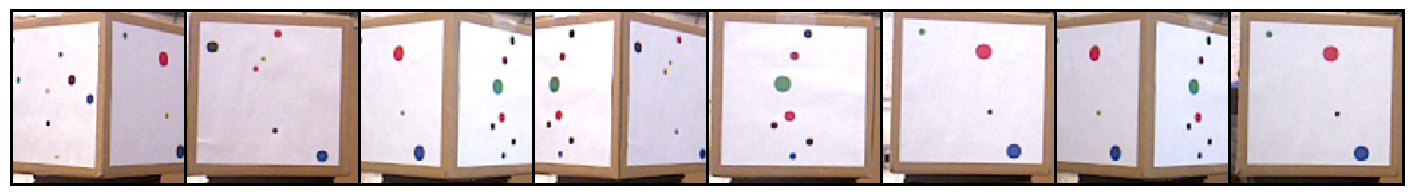

In [5]:
image_size = 128
data_path = glob.glob('data/real_aspects/*')
atg_ds = ATGDataset(data_path, image_size=image_size)
observation_loader = DataLoader( atg_ds, batch_size=1, shuffle=False)
atg_ds_test = ATGDataset(data_path, image_size=image_size)
observation_loader_test = DataLoader( atg_ds_test, batch_size=1, shuffle=True)

transformer = transforms.Compose([
                       transforms.ToPILImage(),
                       transforms.ColorJitter(brightness=0.0, contrast=0.0, saturation=0.0, hue=0.0),
                       transforms.Resize(image_size),
                       transforms.RandomCrop(image_size, pad_if_needed=True, fill=0, padding_mode='constant'),
                       transforms.ToTensor()]) 
aspect_count = 0
autoencoder_mixture = {}
autoencoder_mixture[aspect_count] = {}
autoencoder_mixture[aspect_count]['autoencoder'] = nn.Sequential(Encoder(), Decoder())       
autoencoder_mixture[aspect_count]['recon_error'] = 0

final_aspect_nodes = []
dataiter = iter(observation_loader_test)

for obs_index, image in enumerate(observation_loader):

    recon_loss, recon_loss_norm = get_reconstruction_loss_with_all_ae(image, 
                                                     autoencoder_mixture, 
                                                     loss_fn = torch.nn.functional.mse_loss)
    print(recon_loss, recon_loss_norm, recon_loss_norm .min())
    print('[Observation: %d Num Aspects: %d min recon loss: %.4f]'%(obs_index, aspect_count+1, np.min(recon_loss_norm)))
    
    if recon_loss_norm.min() > 0.02:

        if obs_index != 0:
            aspect_count += 1
            print('Creating aspect_%d'%(aspect_count))
        print()
        final_aspect_nodes.append(image)
        
        autoencoder_mixture[aspect_count] = {}
        autoencoder_mixture[aspect_count]['autoencoder'] = nn.Sequential(Encoder(), Decoder())       
        gen_images = generate_random_versions_of_image(image.squeeze(0), transformer, n_versions=300)
        ds = AutoEncoderDataset(gen_images, aspect_image=image)
        optimizer = optim.Adam(autoencoder_mixture[aspect_count]['autoencoder'].parameters(), lr=1e-3)
        criterion = nn.BCELoss()
        data_loader = DataLoader(ds, batch_size=4, shuffle=True)

        train_autoencoder(autoencoder_mixture[aspect_count]['autoencoder'], 
                          optimizer, 
                          criterion, 
                          data_loader, 
                          number_of_epochs=5, 
                          name='aspect_autoencoder_' + str(aspect_count), verbose=True)

         
        autoencoder_mixture[aspect_count]['autoencoder'].eval()
        
        test_image = to_var(gen_images[0].unsqueeze(0))
        test_image_recon = autoencoder_mixture[aspect_count]['autoencoder'](test_image)
        
        recon_error = torch.nn.functional.mse_loss(test_image_recon, test_image)
        autoencoder_mixture[aspect_count]['recon_error'] = recon_error.data.sum()
        
        random_test_image = to_var(dataiter.next())
        random_test_image_recon = autoencoder_mixture[aspect_count]['autoencoder'](random_test_image)
        
        test_recon_and_image = torch.stack([test_image.data, 
                                            test_image_recon.data, 
                                            random_test_image, 
                                            random_test_image_recon]).squeeze(1).data
        fig=plt.figure(figsize=(18, 16), dpi= 100, facecolor='w', edgecolor='k') 
        imshow(make_grid(test_recon_and_image), True)
        
    
    
final_aspect_nodes = torch.stack(final_aspect_nodes).squeeze(1).data
fig=plt.figure(figsize=(18, 16), dpi= 100, facecolor='w', edgecolor='k') 
imshow(torchvision.utils.make_grid(final_aspect_nodes), True)

    
    


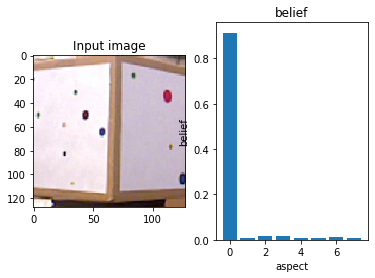

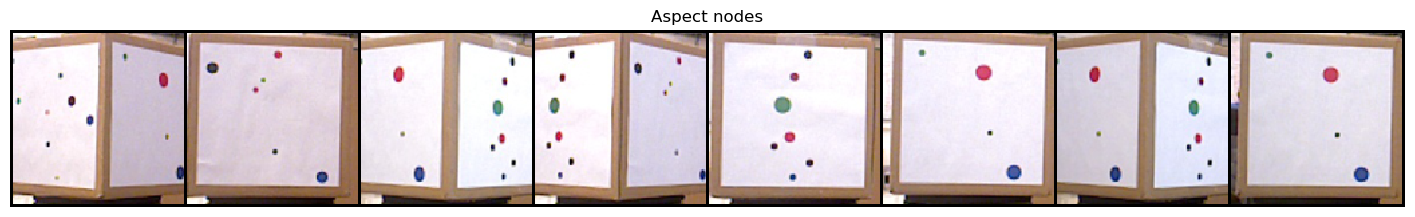

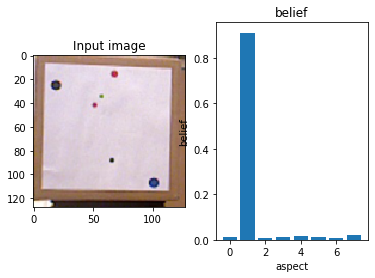

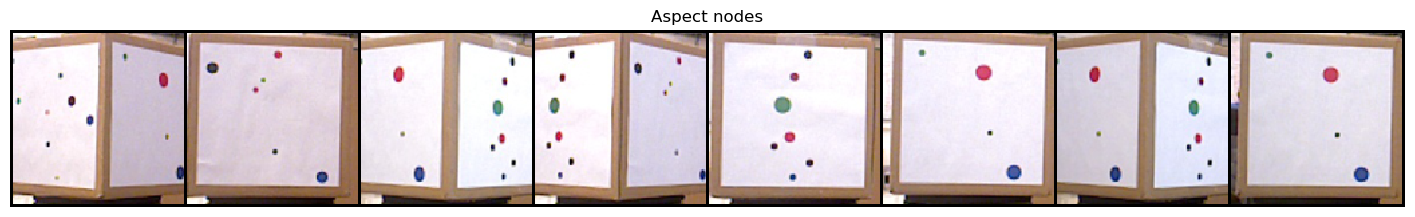

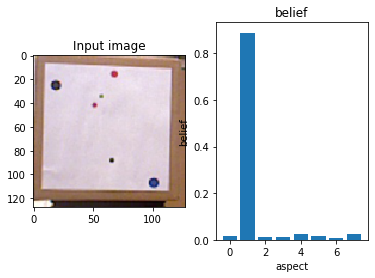

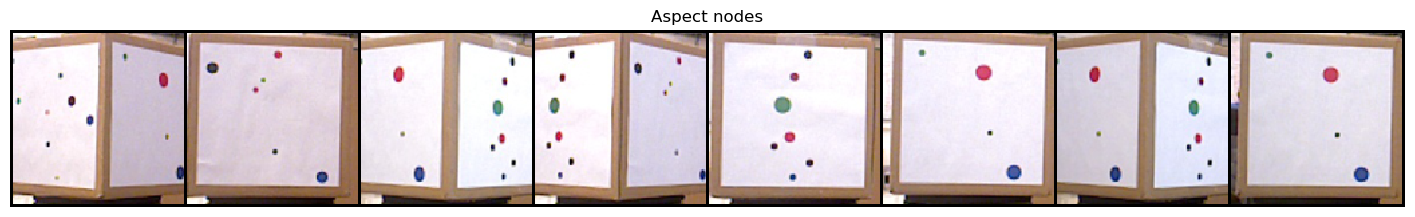

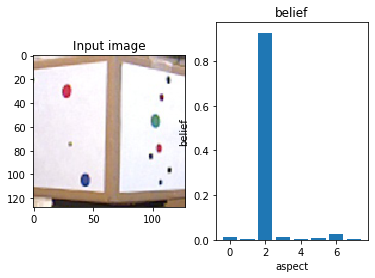

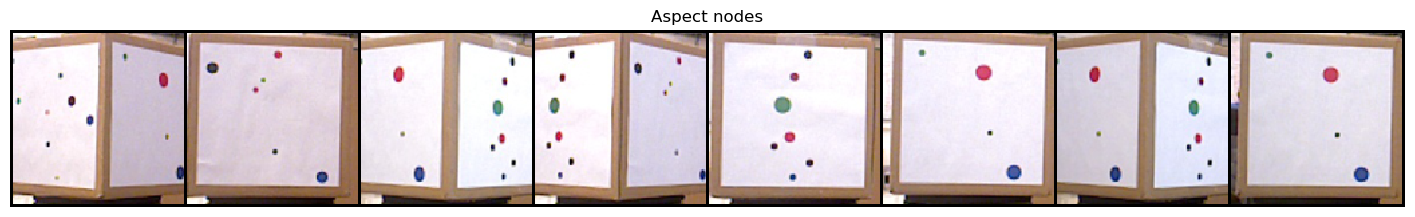

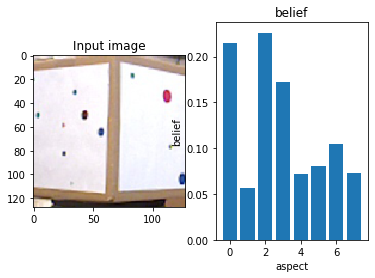

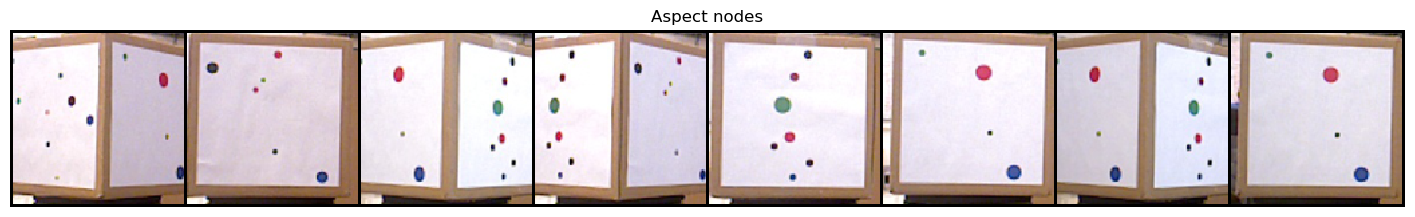

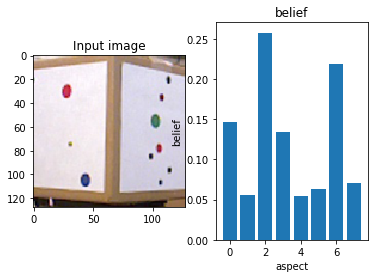

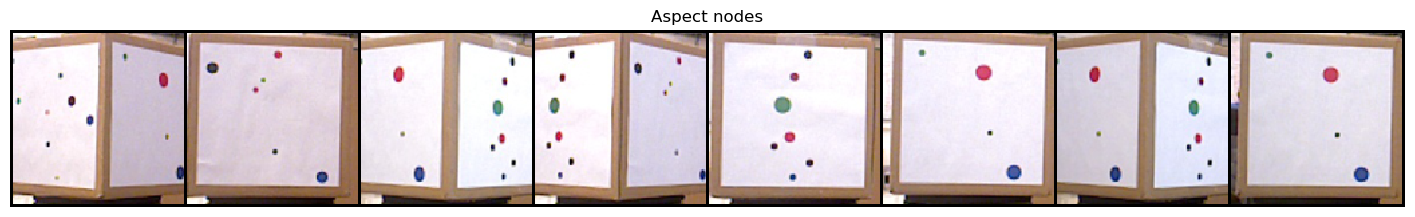

In [6]:
for obs_index, image in enumerate(observation_loader):
        belief = belief_for_observation(image, 
                               autoencoder_mixture, 
                               torch.nn.functional.mse_loss)

        
        plt.subplot(1, 2, 1)
        plt.imshow(image.numpy().squeeze(0).transpose(1, 2, 0))
        plt.title('Input image')
        plt.subplot(1, 2, 2)
        plt.bar(np.arange(belief.shape[0]), belief)
        plt.title('belief')
        plt.xlabel('aspect')
        plt.ylabel('belief')
        fig=plt.figure(figsize=(18, 16), dpi= 100, facecolor='w', edgecolor='k') 
        imshow(make_grid(final_aspect_nodes), False)
        plt.title('Aspect nodes')
        plt.show()
        if obs_index == 5:
            break